In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("/Users/malhar.inamdar/Desktop/cummins/train.csv")

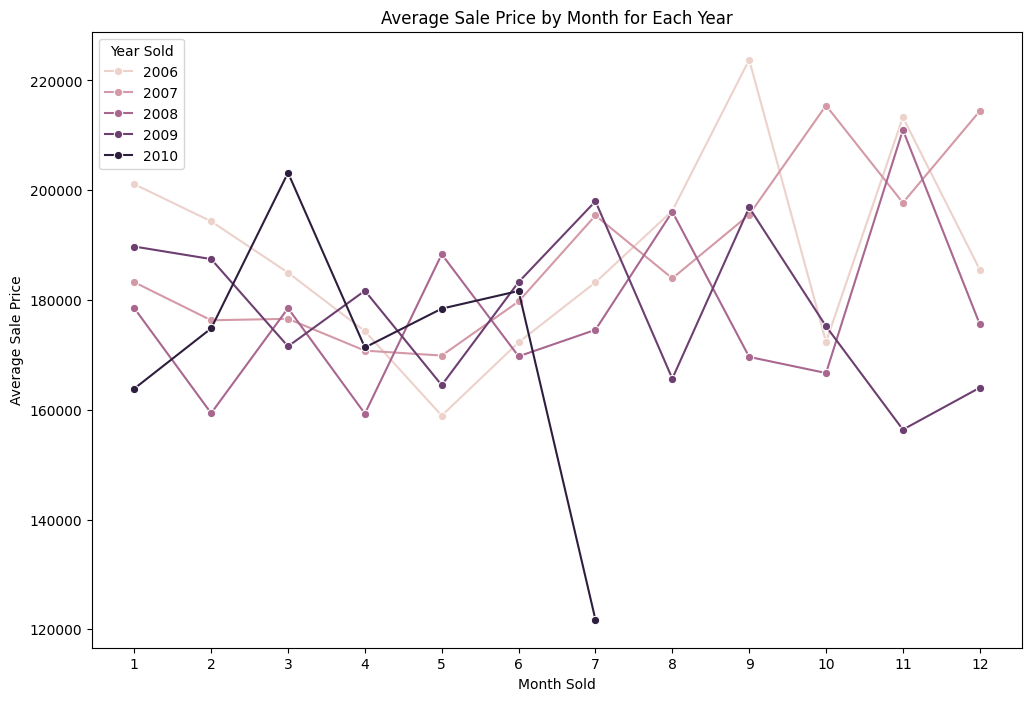

In [2]:
# Group by both Year and Month to capture evolving trends
# combined plot 
yearly_monthly_stats = train_data.groupby(['YrSold', 'MoSold']).agg({
    'SalePrice': ['mean', 'median', 'count']
}).reset_index()

yearly_monthly_stats.columns = ['YrSold', 'MoSold', 'AvgSalePrice', 'MedianSalePrice', 'Count']

# Visualize the trend for each year using a line plot or heatmap
plt.figure(figsize=(12, 8))
sns.lineplot(x='MoSold', y='AvgSalePrice', hue='YrSold', data=yearly_monthly_stats, marker='o')
plt.title('Average Sale Price by Month for Each Year')
plt.xlabel('Month Sold')
plt.ylabel('Average Sale Price')
plt.xticks(range(1, 13))
plt.legend(title='Year Sold')
plt.show()


## overall market analysis

The below plots demonstrate the sales of vehicles done from year 2006-2010, providing a deep analysis into the trend of the market. The average sale price of car is commonly low between the months March-June and highest between September - December.  

Used the following features from the dataset:
1. MoSold
2. YrSold
3. SalePrice

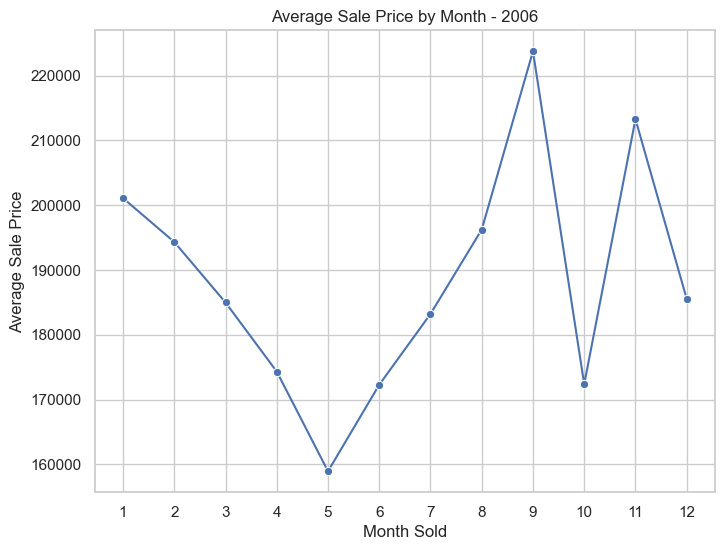

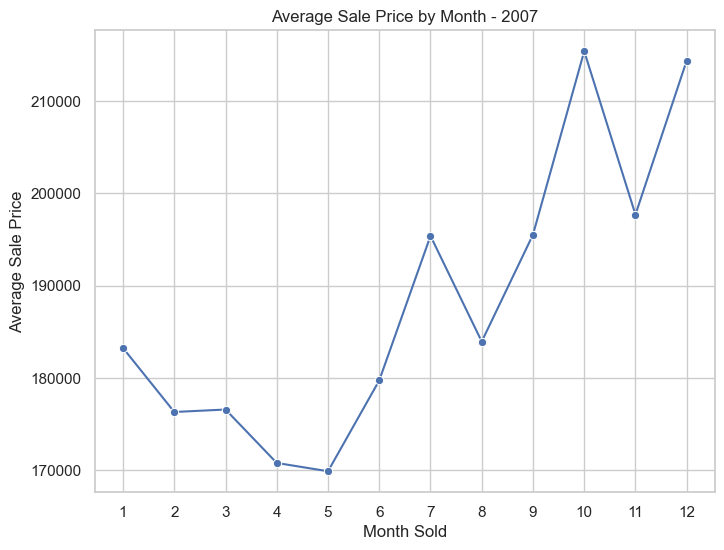

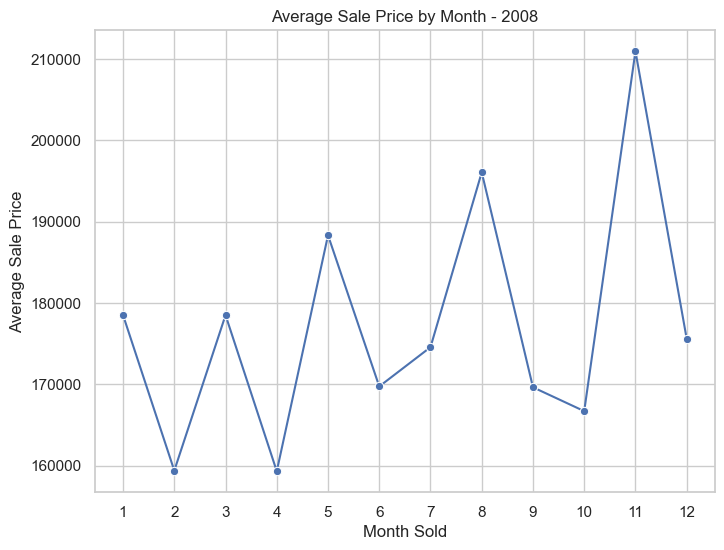

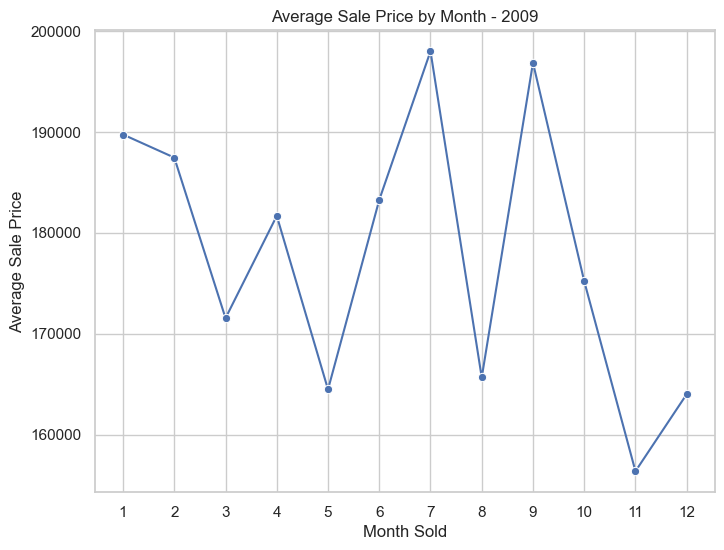

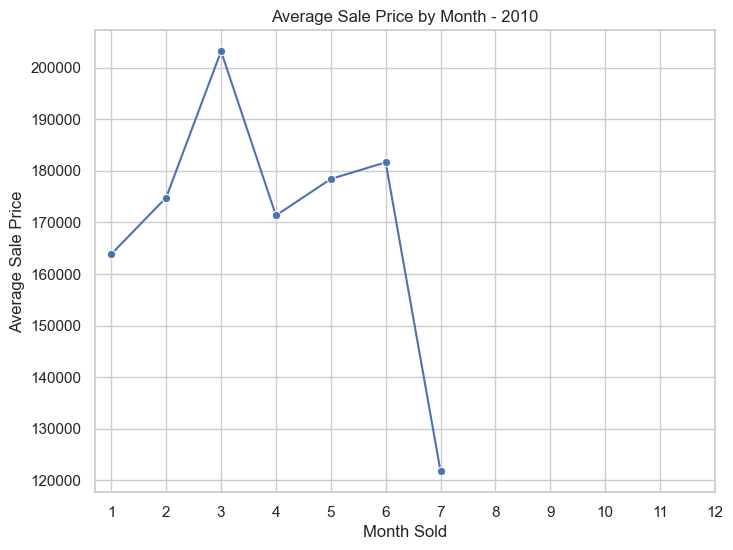

In [6]:
# seperate plots for each year
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'yearly_monthly_stats' as in your code
# If not, replace 'train_data' with the actual name of your DataFrame
try:
    train_data = pd.read_csv('/Users/malhar.inamdar/Desktop/cummins/train.csv')

    # Group by both Year and Month to capture evolving trends
    yearly_monthly_stats = train_data.groupby(['YrSold', 'MoSold']).agg({
        'SalePrice': ['mean', 'median', 'count']
    }).reset_index()

    yearly_monthly_stats.columns = ['YrSold', 'MoSold', 'AvgSalePrice', 'MedianSalePrice', 'Count']

    # Convert YrSold to integer for easier filtering
    yearly_monthly_stats['YrSold'] = yearly_monthly_stats['YrSold'].astype(int)

    # --- Separate Plots for Each Year ---
    unique_years = yearly_monthly_stats['YrSold'].unique()

    for year in unique_years:
        year_data = yearly_monthly_stats[yearly_monthly_stats['YrSold'] == year]
        plt.figure(figsize=(8, 6))
        sns.lineplot(x='MoSold', y='AvgSalePrice', data=year_data, marker='o')
        plt.title(f'Average Sale Price by Month - {year}')
        plt.xlabel('Month Sold')
        plt.ylabel('Average Sale Price')
        plt.xticks(range(1, 13))
        plt.grid(True)
        plt.show()

except FileNotFoundError:
    print("Error: train.csv not found. Please make sure the file is in the current directory.")
except Exception as e:
    print(f"An error occurred: {e}")

## Outcome of analysis
The market trend demonstrates that the best time for selling is usually between September - December and the best time for buying house is between March - June

In [4]:
# Group by month sold
monthly_stats = train_data.groupby('MoSold').agg({
    'SalePrice': ['mean', 'median', 'count']
}).reset_index()

# Rename columns for clarity
monthly_stats.columns = ['MoSold', 'AvgSalePrice', 'MedianSalePrice', 'Count']
print(monthly_stats)


    MoSold   AvgSalePrice  MedianSalePrice  Count
0        1  183256.258621         151650.0     58
1        2  177882.000000         173250.0     52
2        3  183253.924528         165250.0    106
3        4  171503.262411         147000.0    141
4        5  172307.269608         154000.0    204
5        6  177395.735178         163000.0    253
6        7  186331.192308         165195.0    234
7        8  184651.827869         174450.0    122
8        9  195683.206349         185900.0     63
9       10  179563.977528         159000.0     89
10      11  192210.911392         173000.0     79
11      12  186518.966102         178000.0     59


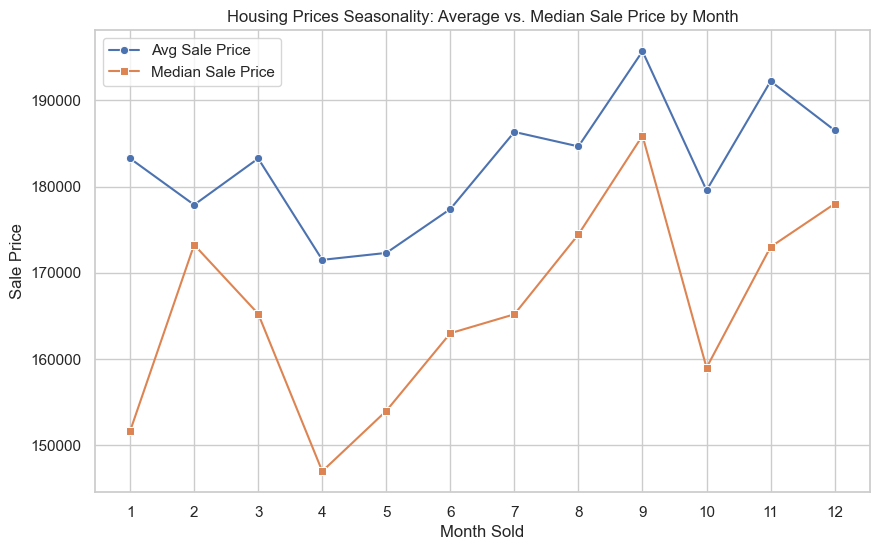

/var/folders/16/tj_n0_gx19x_f2dnbtl3sfkh0000gn/T/ipykernel_13482/3461197240.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MoSold', y='Count', data=monthly_stats, palette='viridis')


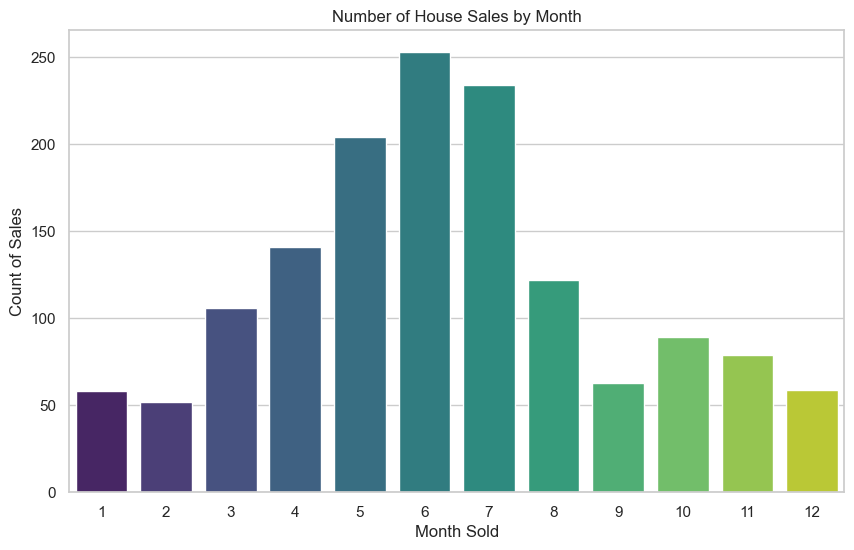

In [5]:
#  plotting style
sns.set(style="whitegrid")

# Plot average sale price by month
plt.figure(figsize=(10, 6))
sns.lineplot(x='MoSold', y='AvgSalePrice', data=monthly_stats, marker='o', label='Avg Sale Price')
sns.lineplot(x='MoSold', y='MedianSalePrice', data=monthly_stats, marker='s', label='Median Sale Price')
plt.title('Housing Prices Seasonality: Average vs. Median Sale Price by Month')
plt.xlabel('Month Sold')
plt.ylabel('Sale Price')
plt.xticks(range(1, 13))
plt.legend()
plt.show()

# Plot the number of transactions per month
plt.figure(figsize=(10, 6))
sns.barplot(x='MoSold', y='Count', data=monthly_stats, palette='viridis')
plt.title('Number of House Sales by Month')
plt.xlabel('Month Sold')
plt.ylabel('Count of Sales')
plt.xticks(range(0, 12), range(1, 13))
plt.show()
